<a href="https://colab.research.google.com/github/Likelipop/03-IML/blob/main/Homework_Form.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable Naive Bayes for this problem.
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

* Age - Age Of The Customer
* Employment Type - The Sector In Which Customer Is Employed
GraduateOrNot - Whether The Customer Is College Graduate Or Not
* AnnualIncome - The Yearly Income Of The Customer In Indian Rupees
* FamilyMembers - Number Of Members In Customer's Family
* ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).
* EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country
* TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

**Submit Link**: https://forms.gle/CwmpBrfa2SYQic7G6

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
!git clone "https://github.com/Likelipop/03-IML.git"

Cloning into '03-IML'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 60 (delta 25), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (60/60), 3.50 MiB | 6.12 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [3]:
import os
cur_path = os.getcwd()
PATH = os.path.join(cur_path, "03-IML/TravelInsurancePrediction.csv")

df = pd.read_csv(PATH)
df.head()
# ToDo: Show histogram of dataframe


,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Data Analysis

<h3>Data Visualization</h3>

<h4>1.age </h4>

Text(0.5, 1.0, 'Age distribution')

<Figure size 1000x500 with 0 Axes>

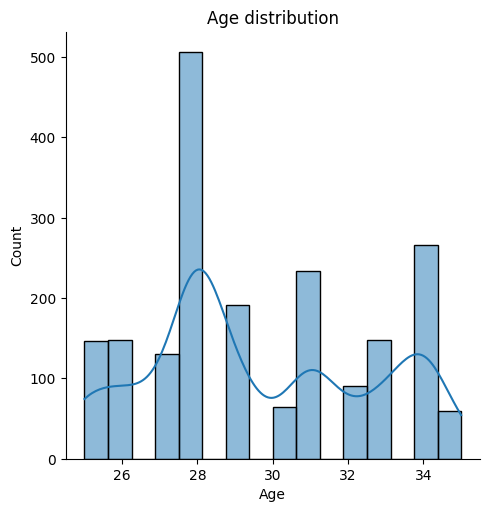

In [4]:
plt.figure(figsize=(10, 5))
sns.displot(data = df['Age'], kde = True)
plt.xlabel("Age")
plt.title("Age distribution")

<h4>2.Binary columns </h4>

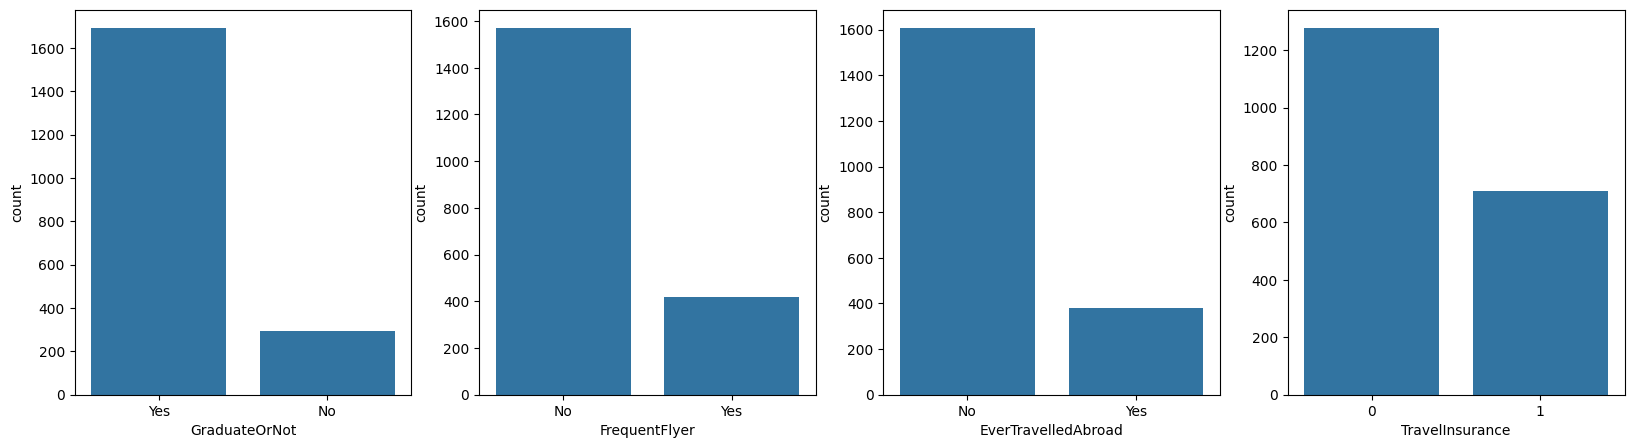

In [5]:
column_barplot = ['GraduateOrNot','FrequentFlyer','EverTravelledAbroad','TravelInsurance']

fig, axis = plt.subplots(1,4, figsize=(20,5))
for i,column in enumerate(column_barplot):
    sns.countplot(x=column, data=df, ax=axis[column_barplot.index(column)])

Text(0.5, 1.0, 'Annual Income distribution ')

<Figure size 1000x500 with 0 Axes>

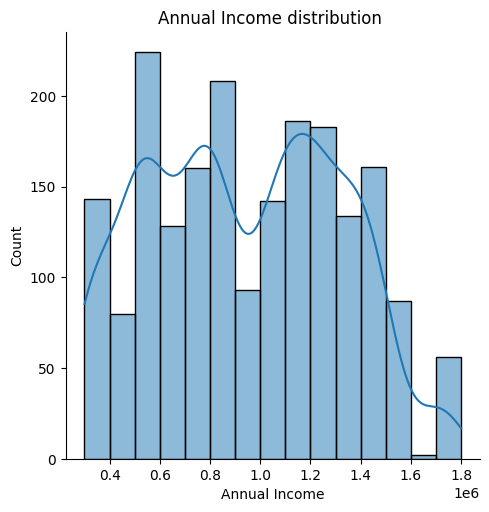

In [6]:
plt.figure(figsize=(10, 5))
sns.displot(data = df['AnnualIncome'], kde = True)
plt.xlabel("Annual Income")
plt.title("Annual Income distribution ")

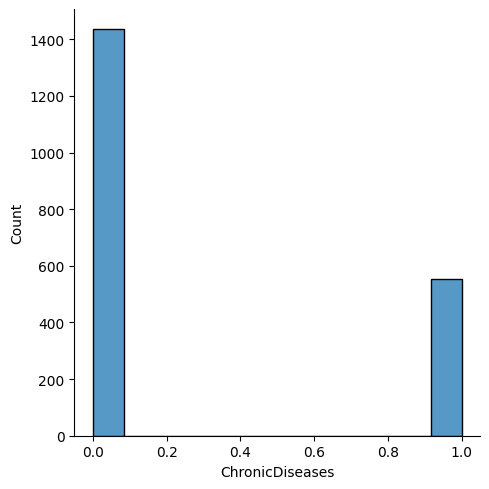

In [7]:
sns.displot(df['ChronicDiseases'] )

## Preprocessing

<h3>Null values check</h3>

In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Employment Type,0
GraduateOrNot,0
AnnualIncome,0
FamilyMembers,0
ChronicDiseases,0
FrequentFlyer,0
EverTravelledAbroad,0
TravelInsurance,0


In [9]:
df.isna().sum()

,0
Unnamed: 0,0
Age,0
Employment Type,0
GraduateOrNot,0
AnnualIncome,0
FamilyMembers,0
ChronicDiseases,0
FrequentFlyer,0
EverTravelledAbroad,0
TravelInsurance,0


<h3>duplicate check </h3>

In [10]:
for i in range(len(df)):
  for j in range(i+1,len(df)):
    if df.iloc[i].equals(df.iloc[j]):
      print(i,j)

In [11]:
df1 = df.drop_duplicates()
len(df1)

1987

<h3> preprocessed pipeline</h3>

In [12]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    if df.isnull().sum().sum() > 0:
      imputer = SimpleImputer(strategy='mean')
      df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    df = df.drop_duplicates()

    return df

In [13]:
df = preprocessing_data(df.copy())

In [14]:
# drop nonsense features
df = df.drop(columns = ["Unnamed: 0"])

In [15]:
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


## Feature Engineering

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into numbers.
    :param df: pandas DataFrame
    :return: Tuple of (Standard Scaled DataFrame, MinMax Scaled DataFrame)
    """
    # Convert categorical variables into dummy/indicator variables
    df = pd.get_dummies(df, columns=['GraduateOrNot','FrequentFlyer','EverTravelledAbroad',"Employment Type",])
    # Normalize using StandardScaler
    print(df.head())
    standard_scaler = StandardScaler()
    df = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)

    # Normalize using MinMaxScaler
    minmax_scaler = MinMaxScaler()
    df = pd.DataFrame(minmax_scaler.fit_transform(df), columns=df.columns)

    return df

df = apply_feature_engineering(df)


   Age  AnnualIncome  FamilyMembers  ChronicDiseases  TravelInsurance  \
0   31        400000              6                1                0   
1   31       1250000              7                0                0   
2   34        500000              4                1                1   
3   28        700000              3                1                0   
4   28        700000              8                1                0   

   GraduateOrNot_No  GraduateOrNot_Yes  FrequentFlyer_No  FrequentFlyer_Yes  \
0             False               True              True              False   
1             False               True              True              False   
2             False               True              True              False   
3             False               True              True              False   
4             False               True             False               True   

   EverTravelledAbroad_No  EverTravelledAbroad_Yes  \
0                    True       

In [17]:
df.head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed
0,0.6,0.066667,0.571429,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.6,0.633333,0.714286,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.9,0.133333,0.285714,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.3,0.266667,0.142857,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.3,0.266667,0.857143,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


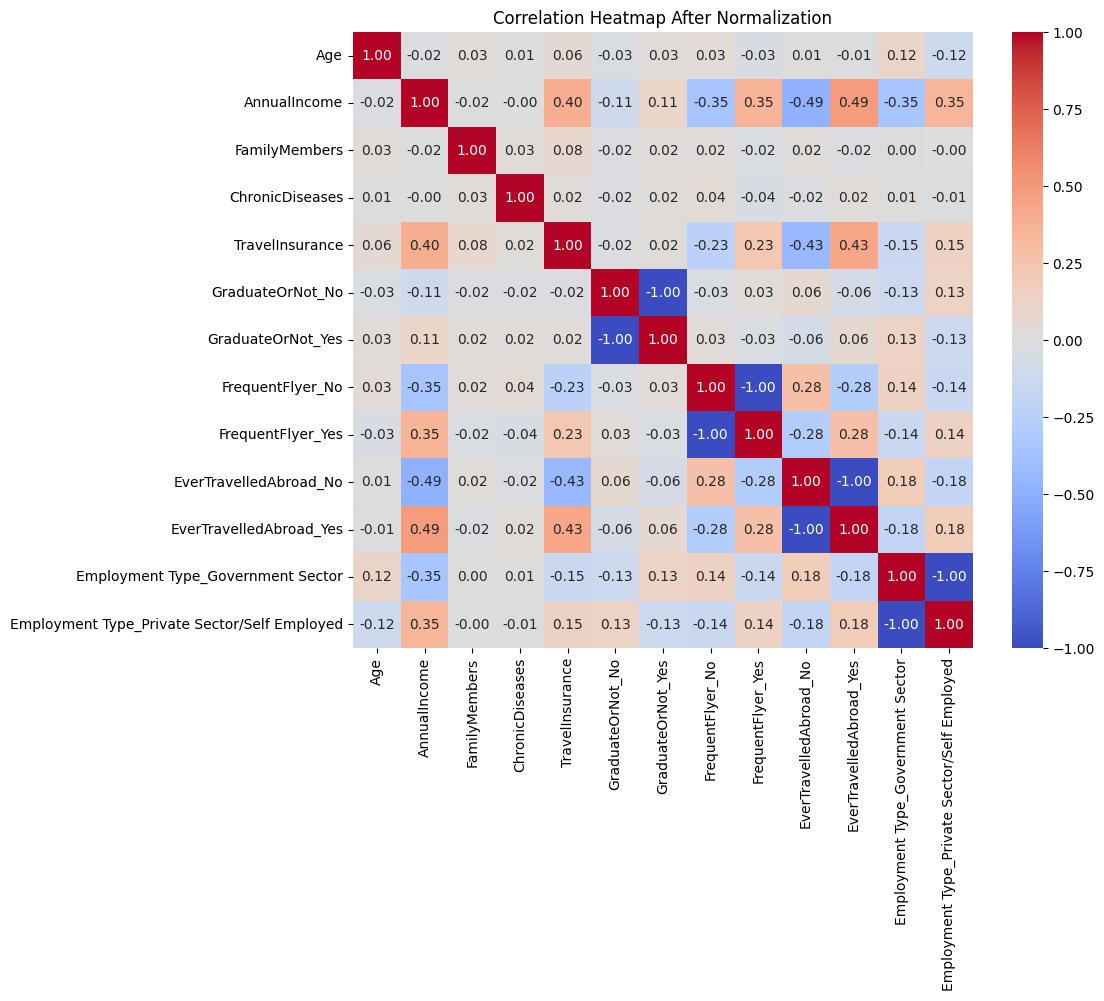

In [18]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap After Normalization")
plt.show()

In [19]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    columns = list(set(df.columns.values) - set('TravelInsurance'))
    X = df[columns]
    y = df['TravelInsurance']# Todo: Select label
    return X, y

X, y = prepare_X_y(df)

In [20]:
X.head()

,FamilyMembers,EverTravelledAbroad_No,GraduateOrNot_No,GraduateOrNot_Yes,Employment Type_Government Sector,EverTravelledAbroad_Yes,Age,Employment Type_Private Sector/Self Employed,TravelInsurance,ChronicDiseases,FrequentFlyer_No,AnnualIncome,FrequentFlyer_Yes
0,0.571429,1.0,0.0,1.0,1.0,0.0,0.6,0.0,0.0,1.0,1.0,0.066667,0.0
1,0.714286,1.0,0.0,1.0,0.0,0.0,0.6,1.0,0.0,0.0,1.0,0.633333,0.0
2,0.285714,1.0,0.0,1.0,0.0,0.0,0.9,1.0,1.0,1.0,1.0,0.133333,0.0
3,0.142857,1.0,0.0,1.0,0.0,0.0,0.3,1.0,0.0,1.0,1.0,0.266667,0.0
4,0.857143,1.0,0.0,1.0,0.0,0.0,0.3,1.0,0.0,1.0,0.0,0.266667,1.0


In [21]:
y = y.apply(lambda x: int (x+0.1))

In [22]:
y.head()

,TravelInsurance
0,0
1,0
2,1
3,0
4,0


# Apply machine learning model

## Train-test split

In [27]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [29]:
trainY.sum()

np.int64(488)

## Build SK-learn model

In [32]:
from sklearn.metrics import classification_report, precision_score, f1_score, recall_score, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB


def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and  model into pipeline
    model = make_pipeline(
        StandardScaler(),
        GaussianNB())

    # Todo: fit your model with X, y
    model.fit(X,y)
    return model

def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)

    # Choose one metric
    main_score = f1
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(testX)
calculate_performance(testY, pred)

Precision: 1.0
Recall: 1.0
Accuracy: 1.0
F1 Score: 1.0


1.0

In [26]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7. " \
           "Other conclusion: "